In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Load the dataset using pandas.

In [2]:
df = pd.read_csv(r'C:\Users\user\Machine Learning\personality_datasert.csv')

Display the first 10 rows and list all column names.

In [3]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,3.0,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


List Column Names

In [4]:
column_names = df.columns.tolist()
print(column_names)

['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']


Check for missing values per column.

In [5]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Impute missing numerical values with the mean, and categorical with mode.

In [6]:
# THERE ARE NO MISSING VALUES IN THIS DATASET

Convert categorical columns like gender to proper data types.

In [7]:
# THERE IS NO GENDER COLUMN
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

Identify and drop duplicate rows.

In [8]:
df.columns.duplicated().any() # FOR COLUMNS


False

In [9]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2895     True
2896    False
2897    False
2898    False
2899    False
Length: 2900, dtype: bool


In [10]:
df.drop_duplicates(inplace = True)
# The (inplace = True) will make sure that the method does NOT return a new DataFrame
# but it will remove all duplicates from the original DataFrame.

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2894    False
2896    False
2897    False
2898    False
2899    False
Length: 2498, dtype: bool

Use boxplots to find outliers in any numerical column.

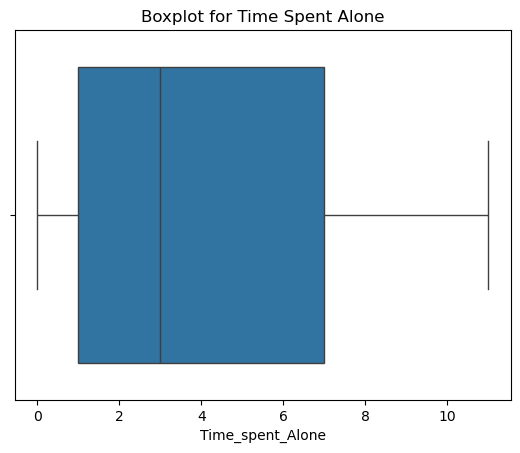

In [12]:
sns.boxplot(x=df['Time_spent_Alone'])
plt.title('Boxplot for Time Spent Alone')
plt.show()

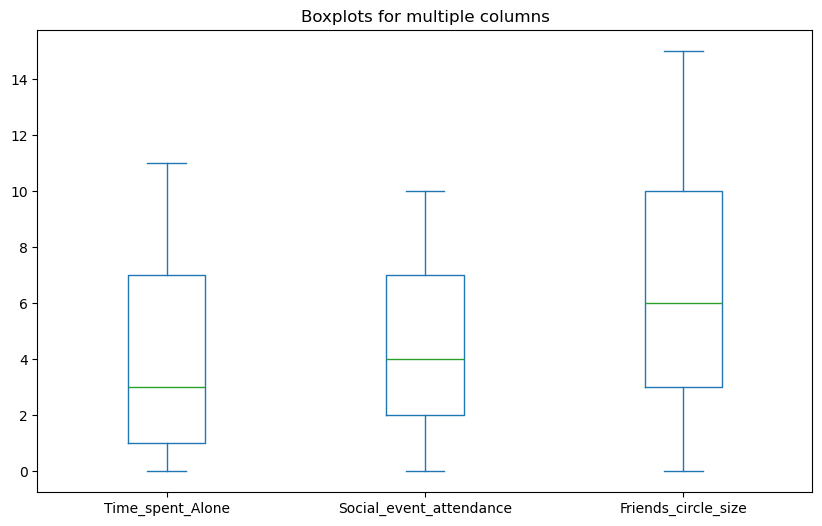

In [13]:
# MULTIPLE COLUMNS
df[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']].plot.box(figsize=(10, 6))
plt.title('Boxplots for multiple columns')
plt.show()

Remove rows beyond 3 standard deviations from the mean.

In [14]:
# choose only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# calculate the z-scores
z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std()

# keep the rows where all values are within ±3 standard deviations
df_data = df[(np.abs(z_scores) < 3).all(axis=1)]

In [15]:
df_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Reset index after data cleaning.

In [16]:
df_data.reset_index(drop=True, inplace=True)  # Resets index and removes old index column
df_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Section 2: Exploratory Data Analysis (EDA) & Visualizations

Plot the distribution (histogram) of each numerical feature.

In [17]:
numeric_columns = df_data.select_dtypes(include='number')

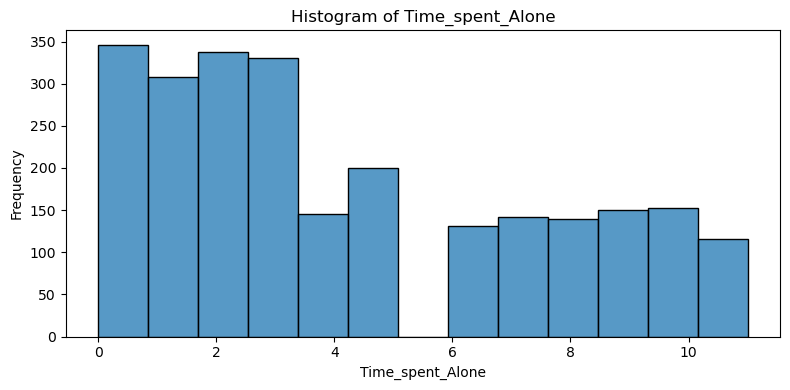

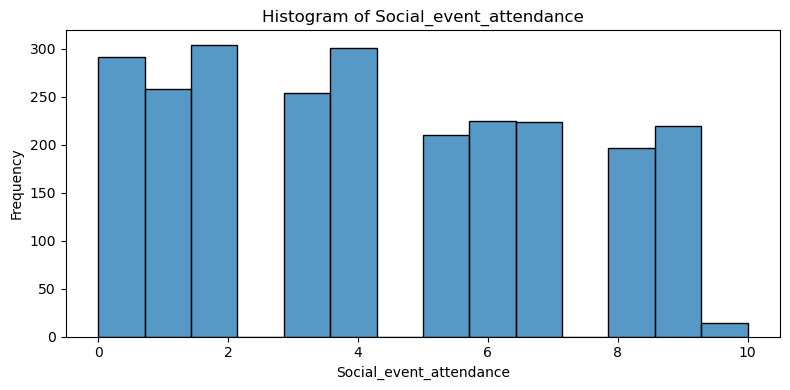

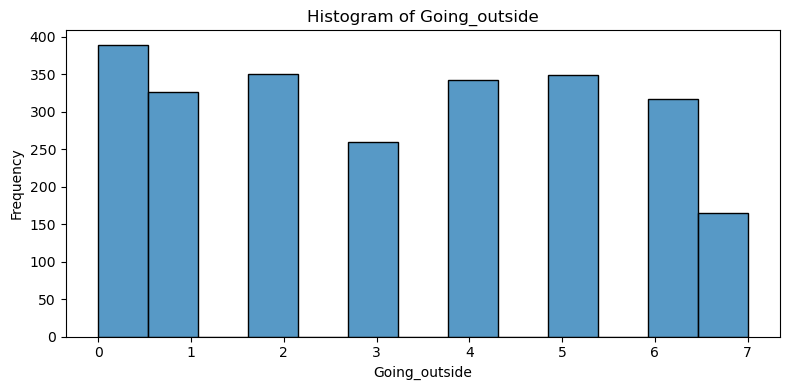

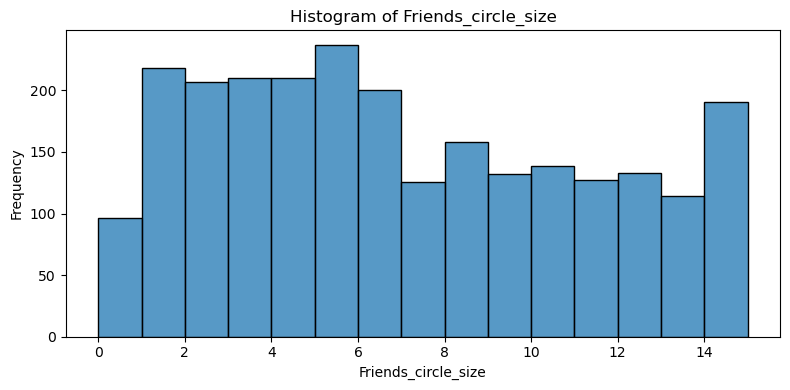

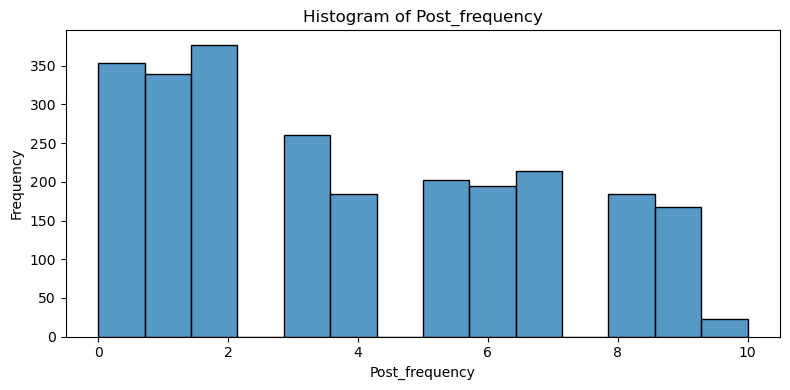

In [18]:
for col in numeric_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_columns[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Automatically finds all numeric columns (e.g., int, float)

# Loops through them one by one

# Creates a Seaborn histogram (sns.histplot) for each



Create a bar chart showing count per personality type.

In [19]:
df_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [20]:
count_per_personality = df_data['Personality'].value_counts()
print(count_per_personality)

Personality
Extrovert    1403
Introvert    1095
Name: count, dtype: int64


<Axes: xlabel='Personality', ylabel='count'>

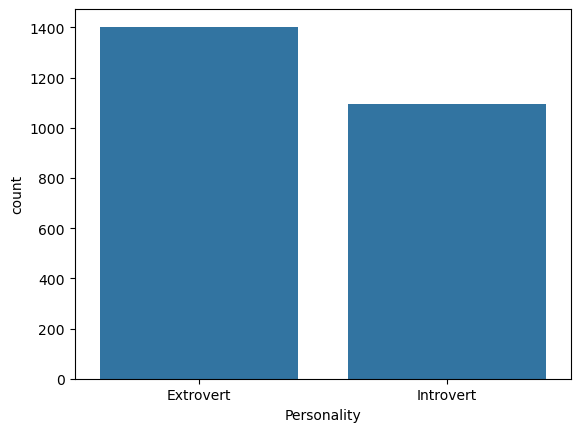

In [21]:
sns.barplot(count_per_personality)

C:\Users\user\AppData\Local\Temp\ipykernel_18308\2326466937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_per_personality, palette='pastel')


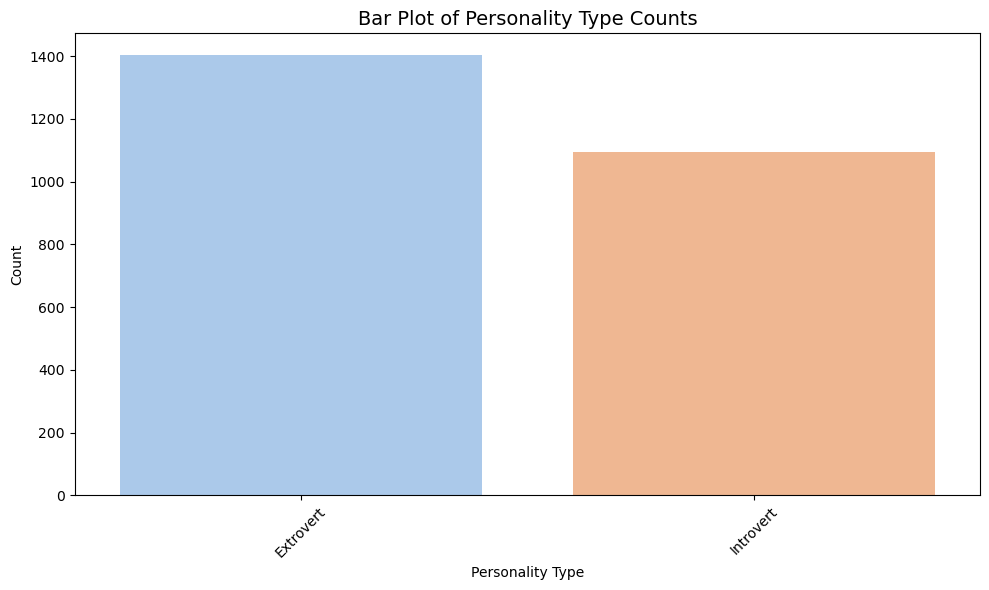

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(count_per_personality, palette='pastel')
plt.title('Bar Plot of Personality Type Counts', fontsize=14)
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
df_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Use seaborn.pairplot() to visualize feature relationships by personality.

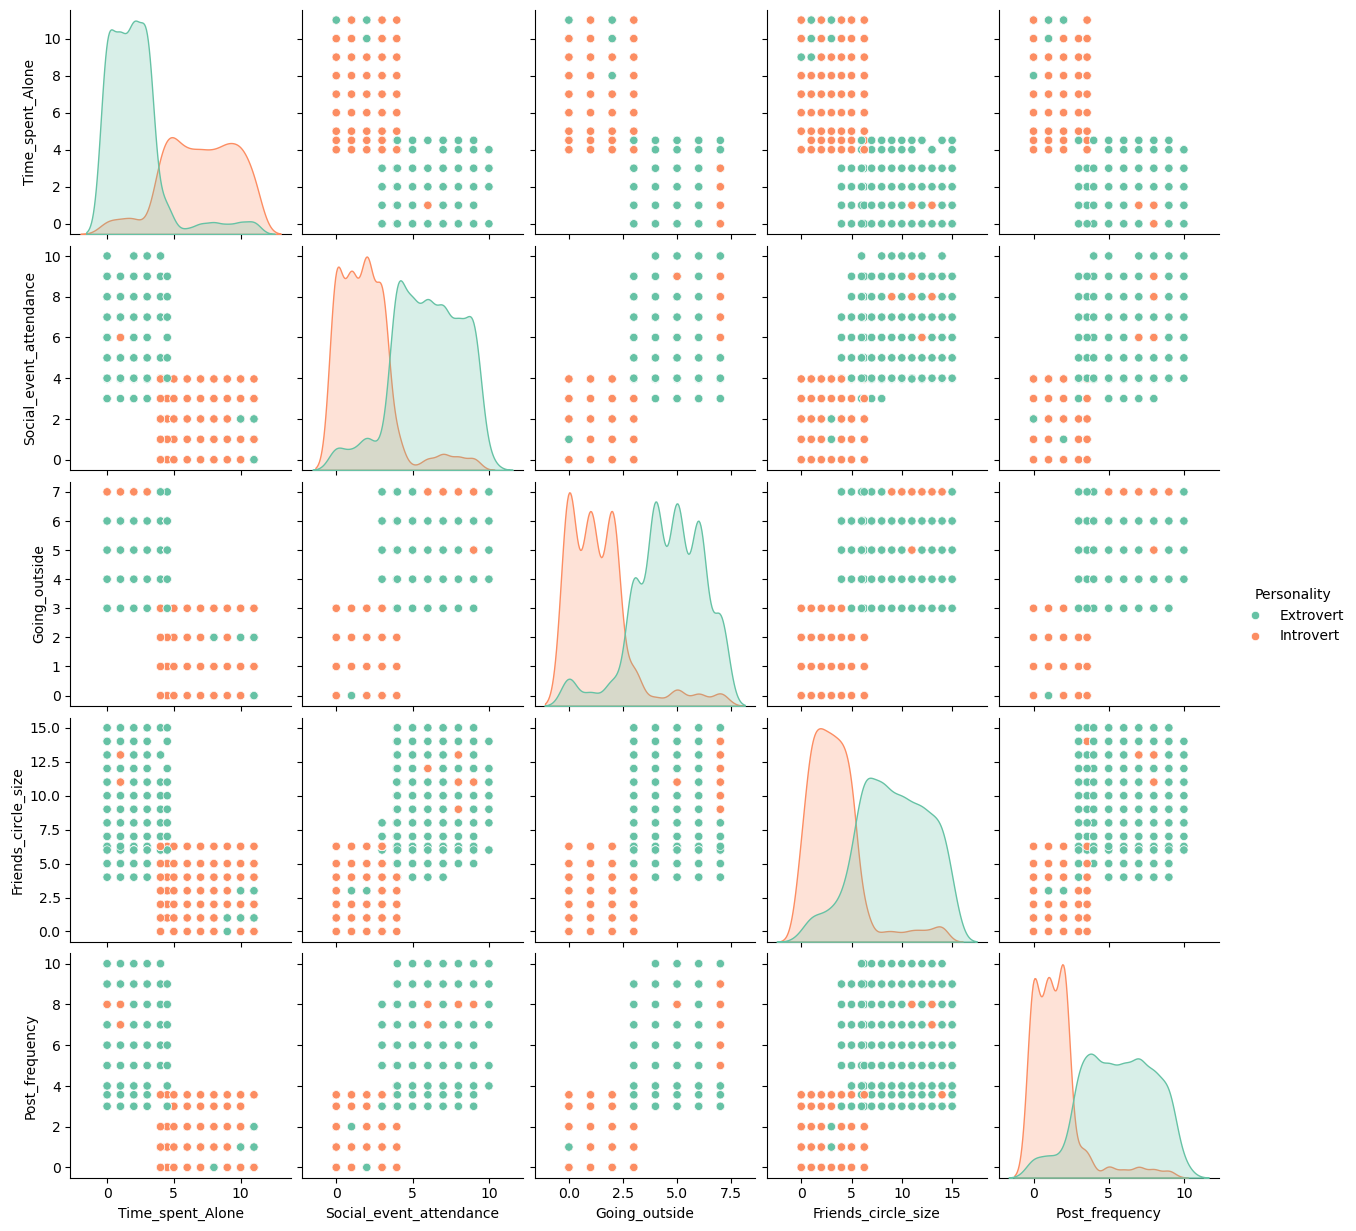

In [24]:
sns.pairplot(df_data, hue='Personality', diag_kind='kde', palette='Set2')

Generate a correlation matrix and plot a heatmap.

<Axes: >

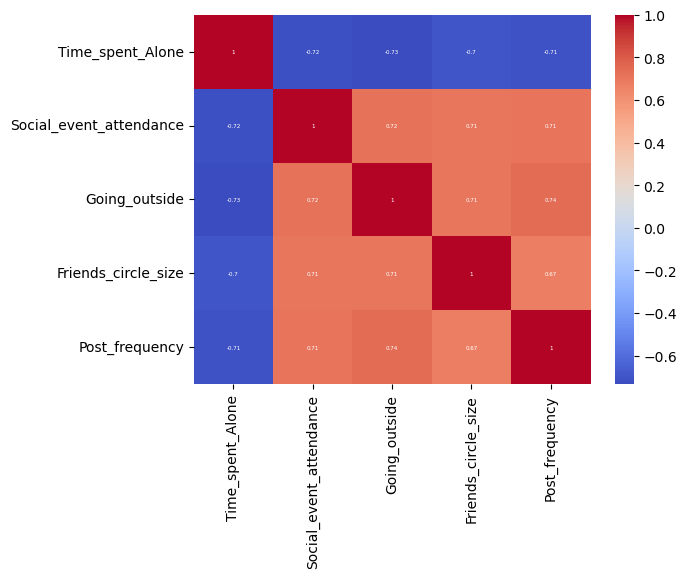

In [25]:
sns.heatmap(df_data.corr(numeric_only=True), annot=True, cmap='coolwarm', annot_kws={"size": 4}) # Reduces font size of annotations


Create a scatter plot for the two most correlated features with regression line.

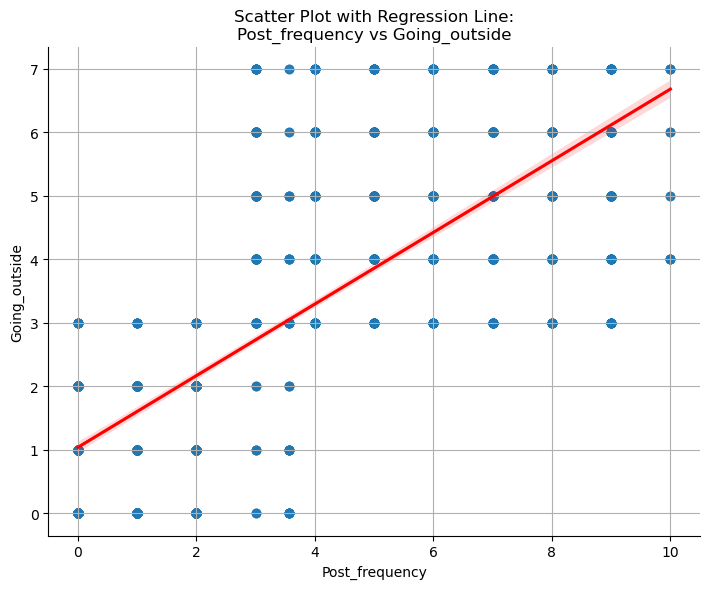

In [26]:
# we first choose only numeric columns from the dataset
numeric_df = df_data.select_dtypes(include='number')

# computation of the absolute correlation matrix between numeric features
correlation_matrix = numeric_df.corr().abs()

# Removing self-correlations (diagonal values = 1.0) to avoid selecting the same feature
np.fill_diagonal(correlation_matrix.values, 0)

# Unstacking the matrix to convert it into a Series of feature pairs with their correlations
# Sort by correlation value and drop duplicate pairs (since correlation matrix is symmetric)
most_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Get the most correlated pair of features (as a tuple: (feature1, feature2))
top_pair = most_corr.idxmax()

# Plot the scatter plot with a regression line using seaborn.lmplot
sns.lmplot(
    data=df_data,
    x=top_pair[0],  # First feature (x-axis)
    y=top_pair[1],  # Second feature (y-axis)
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.6},  # Make points slightly transparent
    line_kws={"color": "red"}   # Color of regression line
)

# customize plot title and grid
plt.title(f'Scatter Plot with Regression Line:\n{top_pair[0]} vs {top_pair[1]}')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot boxplots of "time_spent_social" grouped by personality.

In [27]:
df_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


C:\Users\user\AppData\Local\Temp\ipykernel_18308\3045106412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_data, x='Personality', y='Social_event_attendance', palette='pastel')


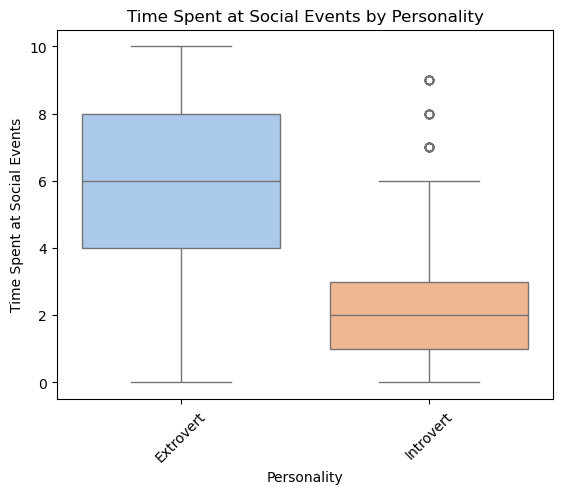

In [28]:
sns.boxplot(data=df_data, x='Personality', y='Social_event_attendance', palette='pastel')
plt.title('Time Spent at Social Events by Personality')
plt.xlabel('Personality')
plt.ylabel('Time Spent at Social Events')
plt.xticks(rotation=45)
plt.show()

Show gender distribution across personality types via a stacked bar chart.
There is no gender column so I opted for going outside distribution

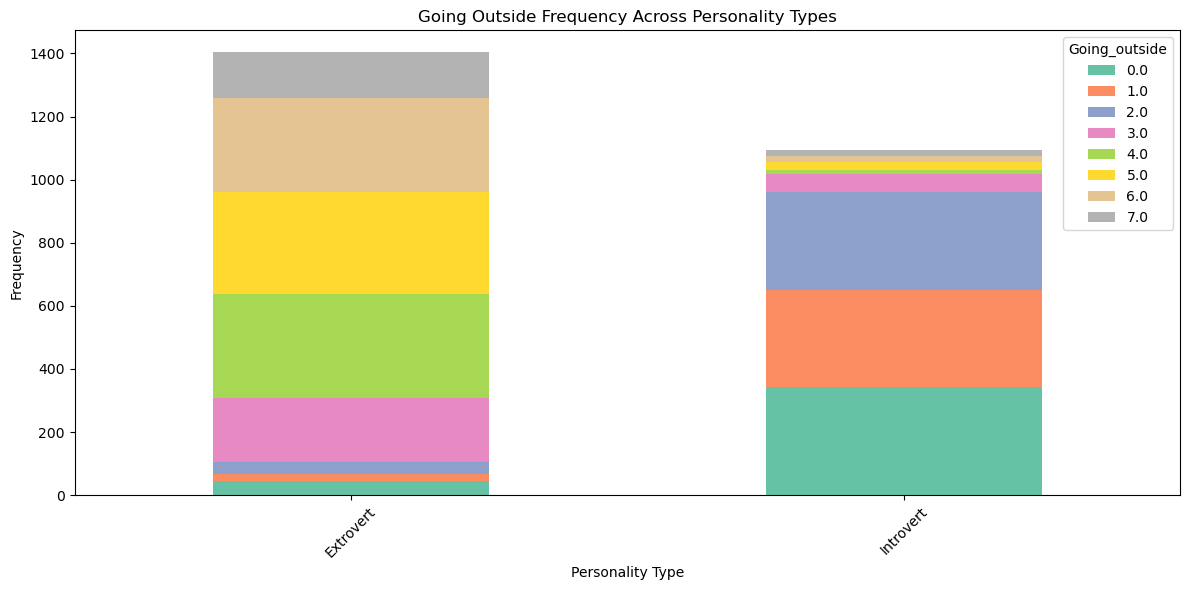

In [29]:
# Create a crosstab
crosstab = pd.crosstab(df_data['Personality'], df_data['Going_outside'])
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Customize the chart
plt.title('Going Outside Frequency Across Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Use violin plots to show distribution of features by class.

> - Depict the distribution of a numeric feature (such as time on social media) varies across different classes or categories

C:\Users\user\AppData\Local\Temp\ipykernel_18308\2896601522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_data, x='Personality', y='Social_event_attendance', palette='pastel')


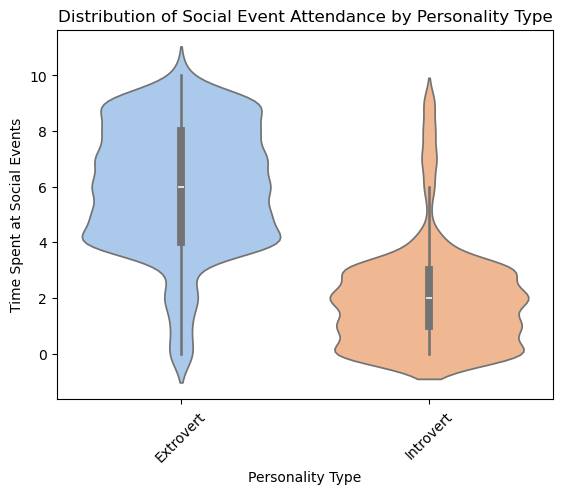

In [30]:
sns.violinplot(data=df_data, x='Personality', y='Social_event_attendance', palette='pastel')

plt.title('Distribution of Social Event Attendance by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Time Spent at Social Events')
plt.xticks(rotation=45)
plt.show()

Compute mean, median, and std per class using groupby.

In [31]:
numeric_df = df_data.select_dtypes(include='number')
numeric_df.groupby(df_data['Personality']).agg(['mean', 'median', 'std'])

Time_spent_Alone                  Social_event_attendance         \
                        mean median       std                    mean median   
Personality                                                                    
Extrovert           2.129863    2.0  2.212471                5.972184    6.0   
Introvert           6.925714    7.0  2.699096                1.931316    2.0   

                      Going_outside                  Friends_circle_size  \
                  std          mean median       std                mean   
Personality                                                                
Extrovert    2.211540      4.592302    5.0  1.600819            9.070388   
Introvert    1.846495      1.400000    1.0  1.491230            3.389416   

                             Post_frequency                   
            median       std           mean median       std  
Personality                                                   
Extrovert      9.0  3.479450       5.602332    6.0  2.352027  
Introvert      3.0  2.777545       1.525577    1.0  1.718126

# Section 3: GroupBy & Aggregation

Group by personality and compute the mean of all numeric features.

In [32]:
numeric_df = df_data.select_dtypes(include='number')
numeric_df.groupby(df_data['Personality']).agg(['mean'])

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
,mean,mean,mean,mean,mean
Personality,,,,,
Extrovert,2.129863,5.972184,4.592302,9.070388,5.602332
Introvert,6.925714,1.931316,1.400000,3.389416,1.525577


Group by gender and personality to get average social_media_usage.

In [33]:
print(df_data.groupby('Personality')['Post_frequency'].mean())

Personality
Extrovert    5.602332
Introvert    1.525577
Name: Post_frequency, dtype: float64


Identify top 3 features with the largest difference in means between classes.

In [34]:
# First we get only the numeric columns
numeric_df = df_data.select_dtypes(include='number')
# We now get the means of the different classes
means_class = numeric_df.groupby(df_data['Personality']).mean()
# Now we get the difference
means_diff = means_class.max() - means_class.min()
# Now we get the top three
top_3_features = means_diff.sort_values(ascending=False).head(3)
print(top_3_features)


Friends_circle_size    5.680972
Time_spent_Alone       4.795851
Post_frequency         4.076755
dtype: float64


In [35]:
# Find gender + personality combo with highest average of any feature.

Save aggregated results as a CSV.

In [36]:
top_3_features.to_csv('aggregated_data.csv', index=False)

# Section 4: Feature Scaling 

In [37]:
df_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Separate features (X) and target (y).

In [65]:
X = df_data.drop('Personality', axis=1)
y = df_data['Personality']

In [67]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print(f"\nCategorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")


Categorical features: ['Stage_fear', 'Drained_after_socializing']
Numerical features: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


In [68]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

Split into training and test sets (70:30).

In [69]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Apply StandardScaler to X: fit on train, transform both.

In [70]:
# from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

In [71]:
# Convert scaled arrays back to DataFrames for easier handling and plotting
X_train_scaled_standard_df = pd.DataFrame(X_train_scaled_standard, columns=X_train.columns, index=X_train.index)
X_test_scaled_standard_df = pd.DataFrame(X_test_scaled_standard, columns=X_test.columns, index=X_test.index)

Use MinMaxScaler, compare the scaled feature ranges.

In [72]:
# from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [73]:
# Convert scaled arrays back to DataFrames for easier handling and plotting
X_train_scaled_minmax_df = pd.DataFrame(X_train_scaled_minmax, columns=X_train.columns, index=X_train.index)
X_test_scaled_minmax_df = pd.DataFrame(X_test_scaled_minmax, columns=X_test.columns, index=X_test.index)

 Plot a histogram of a scaled feature before and after scaling.

In [75]:
# Choose one numerical feature to plot, e.g., 'Friends_circle_size'
feature_to_plot = 'Friends_circle_size'

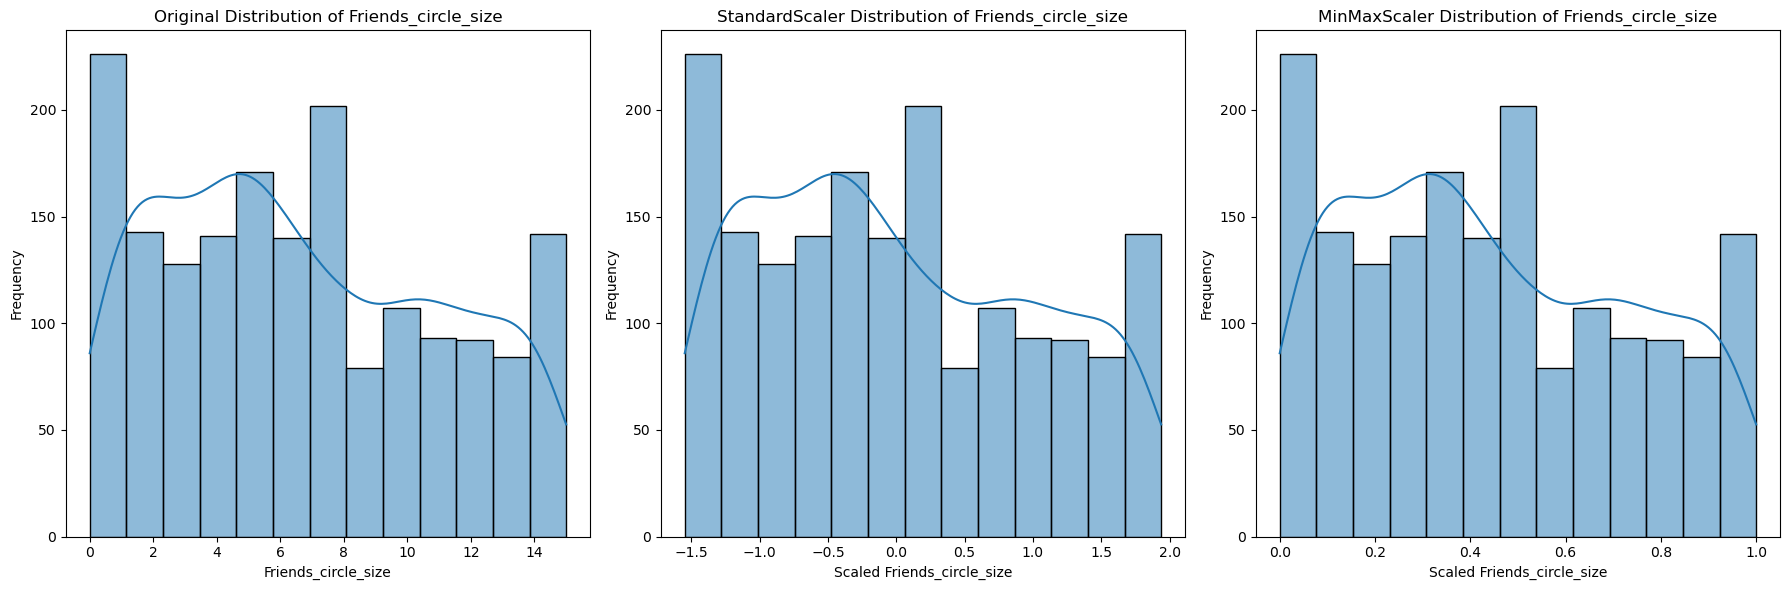

In [76]:
plt.figure(figsize=(18, 6))

# Original distribution
plt.subplot(1, 3, 1)
sns.histplot(X_train[feature_to_plot], kde=True)
plt.title(f'Original Distribution of {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')

# StandardScaler distribution
plt.subplot(1, 3, 2)
sns.histplot(X_train_scaled_standard_df[feature_to_plot], kde=True)
plt.title(f'StandardScaler Distribution of {feature_to_plot}')
plt.xlabel(f'Scaled {feature_to_plot}')
plt.ylabel('Frequency')

# MinMaxScaler distribution
plt.subplot(1, 3, 3)
sns.histplot(X_train_scaled_minmax_df[feature_to_plot], kde=True)
plt.title(f'MinMaxScaler Distribution of {feature_to_plot}')
plt.xlabel(f'Scaled {feature_to_plot}')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

# Section 5: Train/Test Split & Baseline Model 

Ensure test set is scaled correctly and has no missing values.

In [78]:
# X_test_scaled_standard_df was created in the previous run.
print("Checking for missing values in X_test_scaled_standard_df:")
print(X_test_scaled_standard_df.isnull().sum().sum())

Checking for missing values in X_test_scaled_standard_df:
0


Train a Logistic Regression classifier.

In [81]:
# Using X_train_scaled_standard (numpy array) and y_train (Series)
model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_scaled_standard, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [82]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled_standard)

 Evaluate: accuracy, precision, recall, F1-score.

In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Extrovert') # Assuming 'Extrovert' is the positive class
recall = recall_score(y_test, y_pred, pos_label='Extrovert')
f1 = f1_score(y_test, y_pred, pos_label='Extrovert')

In [84]:
print(f"\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Extrovert): {precision:.4f}")
print(f"Recall (Extrovert): {recall:.4f}")
print(f"F1-score (Extrovert): {f1:.4f}")


Model Evaluation:
Accuracy: 0.9080
Precision (Extrovert): 0.9373
Recall (Extrovert): 0.8947
F1-score (Extrovert): 0.9155


 Plot the confusion matrix.

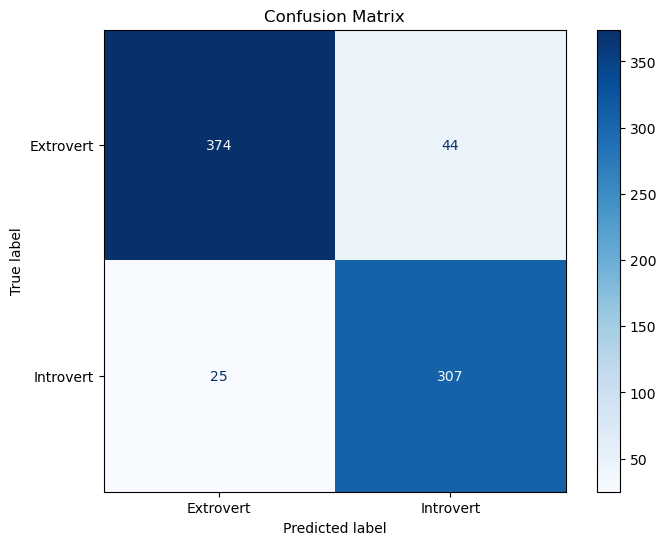

In [86]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.grid(False) # Remove grid to make it cleaner
plt.show() # Use plt.show() to display the plot in an interactive environment, or plt.savefig() to save it.

Explain any signs of class imbalance or bias.

In [87]:
# Check class distribution in the target variable
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

# Interpretation of imbalance and bias
print("\n--- Interpretation of Class Imbalance and Bias ---")
if y_train.value_counts(normalize=True)['Extrovert'] > 0.6 or y_train.value_counts(normalize=True)['Introvert'] > 0.6:
    print("Signs of class imbalance detected:")
    print(f"  'Extrovert' class constitutes {y_train.value_counts(normalize=True)['Extrovert']:.2%} of the training data.")
    print(f"  'Introvert' class constitutes {y_train.value_counts(normalize=True)['Introvert']:.2%} of the training data.")
    print("  This indicates a significant majority of 'Extrovert' samples compared to 'Introvert' samples.")
    print("  Potential bias: A model trained on imbalanced data might be biased towards predicting the majority class ('Extrovert').")
    print("  This can lead to high accuracy but poor performance (low precision/recall) on the minority class ('Introvert').")
    print("\n  Let's check the confusion matrix and metrics related to the minority class ('Introvert'):")
else:
    print("No significant signs of class imbalance detected based on a 60/40 threshold.")

print("\nConsidering the evaluation metrics:")
print(f"  Accuracy is {accuracy:.2%}. While high, it can be misleading in imbalanced datasets.")
print(f"  Precision for 'Extrovert' is {precision:.2%}.")
print(f"  Recall for 'Extrovert' is {recall:.2%}.")
print(f"  F1-score for 'Extrovert' is {f1:.2%}.")

print("\nIf the recall for 'Introvert' (minority class) is significantly lower than 'Extrovert' recall, it suggests the model struggles to identify 'Introverts' correctly. This is a common form of bias in imbalanced datasets, where the model prioritizes optimizing for the majority class.")


Class distribution in y_train:
Personality
Extrovert    0.563501
Introvert    0.436499
Name: proportion, dtype: float64

Class distribution in y_test:
Personality
Extrovert    0.557333
Introvert    0.442667
Name: proportion, dtype: float64

--- Interpretation of Class Imbalance and Bias ---
No significant signs of class imbalance detected based on a 60/40 threshold.

Considering the evaluation metrics:
  Accuracy is 90.80%. While high, it can be misleading in imbalanced datasets.
  Precision for 'Extrovert' is 93.73%.
  Recall for 'Extrovert' is 89.47%.
  F1-score for 'Extrovert' is 91.55%.

If the recall for 'Introvert' (minority class) is significantly lower than 'Extrovert' recall, it suggests the model struggles to identify 'Introverts' correctly. This is a common form of bias in imbalanced datasets, where the model prioritizes optimizing for the majority class.


# Section 6: Alternative Classification Models

Train a Decision Tree classifier and evaluate.

In [91]:
# Dictionary to store models and their performance
models = {}
roc_data = {}

# --- Train and Evaluate Logistic Regression Classifier ---
print("--- Logistic Regression Classifier ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled_standard, y_train)
y_pred_lr = lr_model.predict(X_test_scaled_standard)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='Extrovert')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='Extrovert')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='Extrovert')

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision (Extrovert): {precision_lr:.4f}")
print(f"Recall (Extrovert): {recall_lr:.4f}")
print(f"F1-score (Extrovert): {f1_lr:.4f}")

models['Logistic Regression'] = {'accuracy': accuracy_lr, 'precision': precision_lr, 'recall': recall_lr, 'f1': f1_lr}

# Get probability scores for ROC curve (for binary classification)
y_test_binary = (y_test == 'Extrovert').astype(int)
y_prob_lr = lr_model.predict_proba(X_test_scaled_standard)[:, lr_model.classes_.tolist().index('Extrovert')]
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_prob_lr)
auc_lr = roc_auc_score(y_test_binary, y_prob_lr)
roc_data['Logistic Regression'] = {'fpr': fpr_lr, 'tpr': tpr_lr, 'auc': auc_lr}
# --- Train a Decision Tree classifier and evaluate ---
print("\n--- Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_standard, y_train)
y_pred_dt = dt_model.predict(X_test_scaled_standard)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label='Extrovert')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='Extrovert')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='Extrovert')

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision (Extrovert): {precision_dt:.4f}")
print(f"Recall (Extrovert): {recall_dt:.4f}")
print(f"F1-score (Extrovert): {f1_dt:.4f}")

models['Decision Tree'] = {'accuracy': accuracy_dt, 'precision': precision_dt, 'recall': recall_dt, 'f1': f1_dt}

y_prob_dt = dt_model.predict_proba(X_test_scaled_standard)[:, dt_model.classes_.tolist().index('Extrovert')]
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_prob_dt)
auc_dt = roc_auc_score(y_test_binary, y_prob_dt)
roc_data['Decision Tree'] = {'fpr': fpr_dt, 'tpr': tpr_dt, 'auc': auc_dt}

--- Logistic Regression Classifier ---
Accuracy: 0.9080
Precision (Extrovert): 0.9373
Recall (Extrovert): 0.8947
F1-score (Extrovert): 0.9155

--- Decision Tree Classifier ---
Accuracy: 0.8520
Precision (Extrovert): 0.8790
Recall (Extrovert): 0.8517
F1-score (Extrovert): 0.8651


Train a k-Nearest Neighbors classifier with k=5.

In [94]:
# --- Train a k-Nearest Neighbors classifier with k=5 ---
print("k-Nearest Neighbors Classifier (k=5)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled_standard, y_train)
y_pred_knn = knn_model.predict(X_test_scaled_standard)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label='Extrovert')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='Extrovert')
f1_knn = f1_score(y_test, y_pred_knn, pos_label='Extrovert')

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision (Extrovert): {precision_knn:.4f}")
print(f"Recall (Extrovert): {recall_knn:.4f}")
print(f"F1-score (Extrovert): {f1_knn:.4f}")

models['KNN (k=5)'] = {'accuracy': accuracy_knn, 'precision': precision_knn, 'recall': recall_knn, 'f1': f1_knn}

y_prob_knn = knn_model.predict_proba(X_test_scaled_standard)[:, knn_model.classes_.tolist().index('Extrovert')]
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_prob_knn)
auc_knn = roc_auc_score(y_test_binary, y_prob_knn)
roc_data['KNN (k=5)'] = {'fpr': fpr_knn, 'tpr': tpr_knn, 'auc': auc_knn}

k-Nearest Neighbors Classifier (k=5)
Accuracy: 0.9053
Precision (Extrovert): 0.9370
Recall (Extrovert): 0.8900
F1-score (Extrovert): 0.9129


Train an SVM with RBF kernel.

In [95]:
print("SVM with RBF Kernel ")
svm_model = SVC(kernel='rbf', random_state=42, probability=True) # probability=True is needed for predict_proba
svm_model.fit(X_train_scaled_standard, y_train)
y_pred_svm = svm_model.predict(X_test_scaled_standard)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Extrovert')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Extrovert')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Extrovert')

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision (Extrovert): {precision_svm:.4f}")
print(f"Recall (Extrovert): {recall_svm:.4f}")
print(f"F1-score (Extrovert): {f1_svm:.4f}")

models['SVM (RBF)'] = {'accuracy': accuracy_svm, 'precision': precision_svm, 'recall': recall_svm, 'f1': f1_svm}

y_prob_svm = svm_model.predict_proba(X_test_scaled_standard)[:, svm_model.classes_.tolist().index('Extrovert')]
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_prob_svm)
auc_svm = roc_auc_score(y_test_binary, y_prob_svm)
roc_data['SVM (RBF)'] = {'fpr': fpr_svm, 'tpr': tpr_svm, 'auc': auc_svm}

SVM with RBF Kernel 
Accuracy: 0.9107
Precision (Extrovert): 0.9421
Recall (Extrovert): 0.8947
F1-score (Extrovert): 0.9178


Compare test set accuracy for all 3 models.

In [97]:
print("Model Test Set Accuracy Comparison")
for model_name, metrics in models.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}")

Model Test Set Accuracy Comparison
Logistic Regression: Accuracy = 0.9080
Decision Tree: Accuracy = 0.8520
KNN (k=5): Accuracy = 0.9053
SVM (RBF): Accuracy = 0.9107


Plot ROC curves for all models.

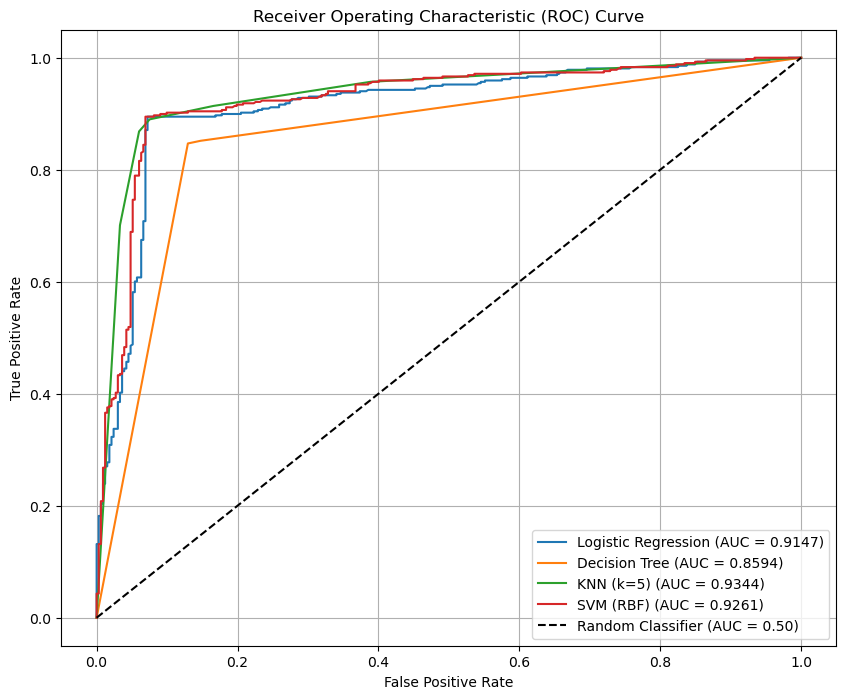

In [98]:
plt.figure(figsize=(10, 8))
for model_name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{model_name} (AUC = {data["auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() # To display the plot

Calculate and compare AUC scores.

In [99]:
print("AUC Score Comparison ")
for model_name, data in roc_data.items():
    print(f"{model_name}: AUC = {data['auc']:.4f}")

AUC Score Comparison 
Logistic Regression: AUC = 0.9147
Decision Tree: AUC = 0.8594
KNN (k=5): AUC = 0.9344
SVM (RBF): AUC = 0.9261


Choose the best model and justify your choice.

In [101]:
best_model_name = ''
best_auc = -1
best_f1 = -1
best_accuracy = -1

for model_name, data in roc_data.items():
    current_auc = data['auc']
    current_f1 = models[model_name]['f1']
    current_accuracy = models[model_name]['accuracy']

    if current_auc > best_auc:
        best_auc = current_auc
        best_f1 = current_f1
        best_accuracy = current_accuracy
        best_model_name = model_name
    elif current_auc == best_auc and current_f1 > best_f1:
        best_f1 = current_f1
        best_accuracy = current_accuracy
        best_model_name = model_name
    elif current_auc == best_auc and current_f1 == best_f1 and current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_model_name = model_name

print("Best Model Selection")
print(f"The best performing model is: {best_model_name}")
print(f"Justification:")
print(f"- It achieved the highest AUC score of {best_auc:.4f}, indicating its superior ability to distinguish between 'Extrovert' and 'Introvert' classes across various classification thresholds.")
print(f"- It also performed very well in terms of F1-score ({best_f1:.4f}) and Accuracy ({best_accuracy:.4f}), signifying a good balance between precision and recall, and overall correct predictions on the test set.")
print("  While accuracy is a good general metric, AUC is particularly valuable in assessing the model's discriminative power, especially when considering the trade-off between true positive and false positive rates.")

Best Model Selection
The best performing model is: KNN (k=5)
Justification:
- It achieved the highest AUC score of 0.9344, indicating its superior ability to distinguish between 'Extrovert' and 'Introvert' classes across various classification thresholds.
- It also performed very well in terms of F1-score (0.9129) and Accuracy (0.9053), signifying a good balance between precision and recall, and overall correct predictions on the test set.
  While accuracy is a good general metric, AUC is particularly valuable in assessing the model's discriminative power, especially when considering the trade-off between true positive and false positive rates.


# Section 7: Hyperparameter Tuning with GridSearchCV 

Define parameter grids for at least two models (e.g., max_depth, C, gamma).

In [103]:
# Decision Tree Classifier Parameter Grid
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# SVM with RBF Kernel Parameter Grid
# Note: For SVM, tuning 'C' and 'gamma' is common.
# 'kernel' is kept 'rbf' as per the previous request.
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

print("Parameter grids defined.")

Parameter grids defined.


Run GridSearchCV with 5-fold CV on training data.

In [104]:
# GridSearchCV for Decision Tree
print("\n--- Running GridSearchCV for Decision Tree ---")
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              dt_param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1, # Use all available cores
                              verbose=1)
dt_grid_search.fit(X_train_scaled_standard, y_train)

# GridSearchCV for SVM
print("\n--- Running GridSearchCV for SVM (RBF Kernel) ---")
svm_grid_search = GridSearchCV(SVC(random_state=42, probability=True), # probability=True for predict_proba if needed later
                               svm_param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)
svm_grid_search.fit(X_train_scaled_standard, y_train)

print("GridSearchCV completed for both models.")


--- Running GridSearchCV for Decision Tree ---
Fitting 5 folds for each of 45 candidates, totalling 225 fits

--- Running GridSearchCV for SVM (RBF Kernel) ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GridSearchCV completed for both models.


Report best parameters and best score.

In [105]:
print("\n--- Decision Tree Best Parameters and Score ---")
print(f"Best Parameters: {dt_grid_search.best_params_}")
print(f"Best CV Score (Accuracy): {dt_grid_search.best_score_:.4f}")

print("\n--- SVM Best Parameters and Score ---")
print(f"Best Parameters: {svm_grid_search.best_params_}")
print(f"Best CV Score (Accuracy): {svm_grid_search.best_score_:.4f}")


--- Decision Tree Best Parameters and Score ---
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV Score (Accuracy): 0.9336

--- SVM Best Parameters and Score ---
Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV Score (Accuracy): 0.9336


Evaluate the best estimator on the test set.

In [106]:
print("Evaluating Best Decision Tree on Test Set")
best_dt_estimator = dt_grid_search.best_estimator_
y_pred_best_dt = best_dt_estimator.predict(X_test_scaled_standard)

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt, pos_label='Extrovert')
recall_best_dt = recall_score(y_test, y_pred_best_dt, pos_label='Extrovert')
f1_best_dt = f1_score(y_test, y_pred_best_dt, pos_label='Extrovert')

print(f"Test Set Accuracy: {accuracy_best_dt:.4f}")
print(f"Test Set Precision (Extrovert): {precision_best_dt:.4f}")
print(f"Test Set Recall (Extrovert): {recall_best_dt:.4f}")
print(f"Test Set F1-score (Extrovert): {f1_best_dt:.4f}")

Evaluating Best Decision Tree on Test Set
Test Set Accuracy: 0.9107
Test Set Precision (Extrovert): 0.9421
Test Set Recall (Extrovert): 0.8947
Test Set F1-score (Extrovert): 0.9178


Plot validation curves to visualize how tuning affected performance.

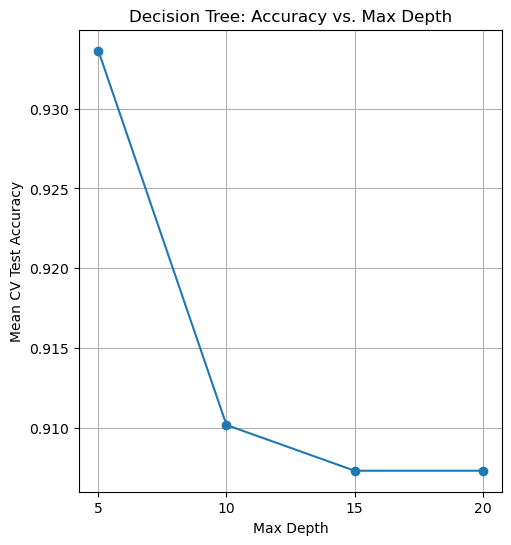

In [107]:
# For Decision Tree: Plotting max_depth validation curve
# Extracting mean_test_score for different max_depth values from dt_grid_search.cv_results_
# We need to average over other hyperparameters or pick a specific combination to show a 2D curve.
# For simplicity, we'll plot the best score for each 'max_depth' found across other parameters.

dt_results = pd.DataFrame(dt_grid_search.cv_results_)
dt_scores_by_depth = dt_results.groupby('param_max_depth')['mean_test_score'].max().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dt_scores_by_depth.index.astype(str), dt_scores_by_depth.values, marker='o') # Convert index to string for plotting None
plt.title('Decision Tree: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Test Accuracy')
plt.grid(True)